We will use the athlete data from the previous noptebook. 
Load it into 2 arrays again. 

In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np

In [2]:
dfNBA = pd.read_csv("NBA.csv")
dfNFL = pd.read_csv("NFL.csv")
#Take the height column
nba = np.array(dfNBA["Height"])
nfl = np.array(dfNFL["Height (inches)"])
#Dump the non-numbers
nba = nba[~np.isnan(nba)]
nfl = nfl[~np.isnan(nfl)]

Check to make sure that the data loaded and is good to go.

In [3]:
print("NBA Mean Height: "+str(np.mean(nba)))
print("NFL Mean Height: "+str(np.mean(nfl)))

NBA Mean Height: 197.44075829383885
NFL Mean Height: 73.50839891929989


The previous 2 methods of looking at the distribution showed us versions of "how many of X are Y" - e.g. how many players are 187cm tall. 

We may also want/need to look at cumulative measurements - "how many of X are over/under Y" - e.g. how many players are over 215cm, or under 172.523cm. Enter percentiles...

Percentiles measure how far along the scale a value is - how many items a value is larger than, and the inverse, how many are higher than it. E.g. if you are in a class of 10 people, and you are the second tallest, you are in the 90th percentile of height - 90% of people in that sample are the same or shorter than you; the remaining 10% are taller. If you've been scored on a standardized test, you've probably gotten some kind of number like this. (The book has a more thorough explationation of percentile stuff)

In order to calculate things, we need two functions that are basically inverses of eachother. Percentile rank takes in a value and calculates what percentile that is in. Percentile does the opposite, takes in a percentile, and calculates the value. (Read the book on this, it has the details)
Percentile rank: value->ranking on percentile scale. e.g. I scored 72%, and the function tells me I'm in the 80th percentile. 
percentile: ranking->value. e.g. I'm in the 64th percentile of my graduating class, that means I have a 3.1 GPA.

In [4]:
#The percentile functions
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]

def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

The CDF is basically a different look at the percentile rank - given a value, how far "up the scale" are we.

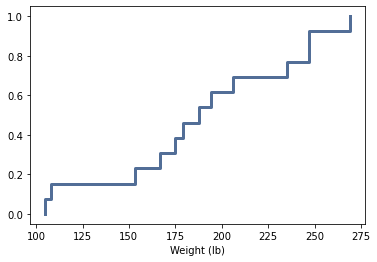

<Figure size 576x432 with 0 Axes>

In [10]:
#Simple dummy example
#Pretend these are weights in pounds
sample = thinkstats2.Cdf([105,235,153,194,175,206,167,188,179,108,247,269,247])
thinkplot.Cdf(sample)
thinkplot.Show(xlabel="Weight (lb)")

We can read these CDF graphs like this... If I am 225lb, I can look that up on the x-axis. The corresponding y value is my percentile rank - I'm in apx the 70th percentile, or I'm heavier than about 70% of the people in the sample. 

How does the shape of a CDF relate to the shape of a PDF? With different standard deviations? Create a CDF with the numbers 1-10, what does that look like? What can you infer about the distribution?